In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data_path = './FiveCitiePMData/BeijingPM20100101_20151231.csv'
df = pd.read_csv(data_path)

df["datetime"] = pd.to_datetime(dict(year=df.year, month=df.month, day=df.day, hour=df.hour))

df.describe()



,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,25052.000000,20508.000000,24931.000000,50387.000000,52579.000000,52245.000000,52245.000000,52579.000000,52579.000000,52100.000000,52100.000000
mean,26292.500000,2012.499772,6.523962,15.726609,11.500000,2.491100,89.154439,92.560806,88.643737,95.904241,2.074554,54.602421,1016.465442,12.587040,23.261829,19.258683,19.519008
std,15179.837614,1.707485,3.448452,8.798896,6.922252,1.116988,87.239267,88.027434,88.041166,91.643772,14.222059,25.991338,10.295070,12.098527,49.281706,4381.035532,4381.036040
min,1.000000,2010.000000,1.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,1.000000,-40.000000,2.000000,991.000000,-19.000000,0.450000,0.000000,0.000000
25%,13146.750000,2011.000000,4.000000,8.000000,5.750000,1.000000,24.000000,28.000000,24.000000,27.000000,-10.000000,31.000000,1008.000000,2.000000,1.790000,0.000000,0.000000
50%,26292.500000,2012.000000,7.000000,16.000000,11.500000,2.000000,64.000000,68.000000,62.000000,69.000000,2.000000,55.000000,1016.000000,14.000000,4.920000,0.000000,0.000000
75%,39438.250000,2014.000000,10.000000,23.000000,17.250000,3.000000,124.000000,127.000000,122.000000,132.000000,15.000000,78.000000,1025.000000,23.000000,21.020000,0.000000,0.000000
max,52584.000000,2015.000000,12.000000,31.000000,23.000000,4.000000,737.000000,672.000000,844.000000,994.000000,28.000000,100.000000,1046.000000,42.000000,585.600000,999990.000000,999990.000000


In [5]:

selected_variables = ["year","month","day","hour","season","PM_Dongsi", "PM_Dongsihuan","HUMI","TEMP","PRES","Iws","precipitation","datetime"] 
# analysis_df = df.loc[df.PM_Dongsi.notna()][["PM_Dongsi","PM_Dongsihuan","PM_Nongzhanguan","year","month","day","hour","season","HUMI","PRES","TEMP"]][:1000]

train_df = df.loc[df.PM_Dongsi.notna()][selected_variables]
train_df = train_df.loc[train_df.PM_Dongsihuan.notna()]
train_df = train_df.loc[train_df.precipitation.notna()]
train_df = train_df.loc[train_df.HUMI.notna()]
train_df = train_df.loc[train_df.TEMP.notna()]
train_df = train_df.loc[train_df.PRES.notna()]

train_df.describe()

,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,HUMI,TEMP,PRES,Iws,precipitation
count,19726.000000,19726.000000,19726.000000,19726.000000,19726.000000,19726.000000,19726.000000,19726.000000,19726.000000,19726.000000,19726.000000,19726.000000
mean,2013.926087,6.418027,15.453665,11.490317,2.342543,86.831948,92.638396,51.221484,14.144784,1015.284548,21.189597,0.050684
std,0.762832,3.307302,8.688512,6.935947,1.120077,83.069278,88.479500,25.482827,11.500823,10.204335,46.513787,0.625632
min,2013.000000,1.000000,1.000000,0.000000,1.000000,3.000000,3.000000,2.000000,-12.000000,991.000000,0.450000,0.000000
25%,2013.000000,4.000000,8.000000,5.000000,1.000000,25.000000,28.000000,29.000000,4.000000,1007.000000,1.790000,0.000000
50%,2014.000000,6.000000,15.000000,11.000000,2.000000,64.000000,68.000000,51.000000,15.000000,1015.000000,4.920000,0.000000
75%,2015.000000,9.000000,23.000000,18.000000,3.000000,121.000000,128.000000,73.000000,24.000000,1023.000000,19.680000,0.000000
max,2015.000000,12.000000,31.000000,23.000000,4.000000,737.000000,672.000000,100.000000,40.000000,1041.000000,490.380000,30.400000


In [6]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

# import the algorithm you want to evaluate on your features.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

_x_fields = ["season","HUMI","TEMP","PRES","Iws","precipitation", "PM_Dongsihuan"]
X = train_df[_x_fields]
y = train_df["PM_Dongsi"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

model = LinearRegression()
# create the ExhaustiveFeatureSelector object.
efs = ExhaustiveFeatureSelector(model, 
           min_features=2,
           max_features=len(_x_fields), 
           scoring='r2',
           cv=2)

# fit the object to the training data.
efs = efs.fit(X_train, y_train)

# print the selected features.
selected_features = X_train.columns[list(efs.best_idx_)]
print(selected_features)

# print the final prediction score.
print('Best accuracy score: %.2f' % efs.best_score_)


print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

# transform to the newly selected features.
X_train_efs = efs.transform(X_train)
X_test_efs = efs.transform(X_test)

model.fit(X_train_efs, y_train)

Features: 120/120

Index(['season', 'TEMP', 'PRES', 'Iws', 'precipitation', 'PM_Dongsihuan'], dtype='object')
Best accuracy score: 0.87
Best subset (indices): (0, 2, 3, 4, 5, 6)
Best subset (corresponding names): ('season', 'TEMP', 'PRES', 'Iws', 'precipitation', 'PM_Dongsihuan')


LinearRegression()

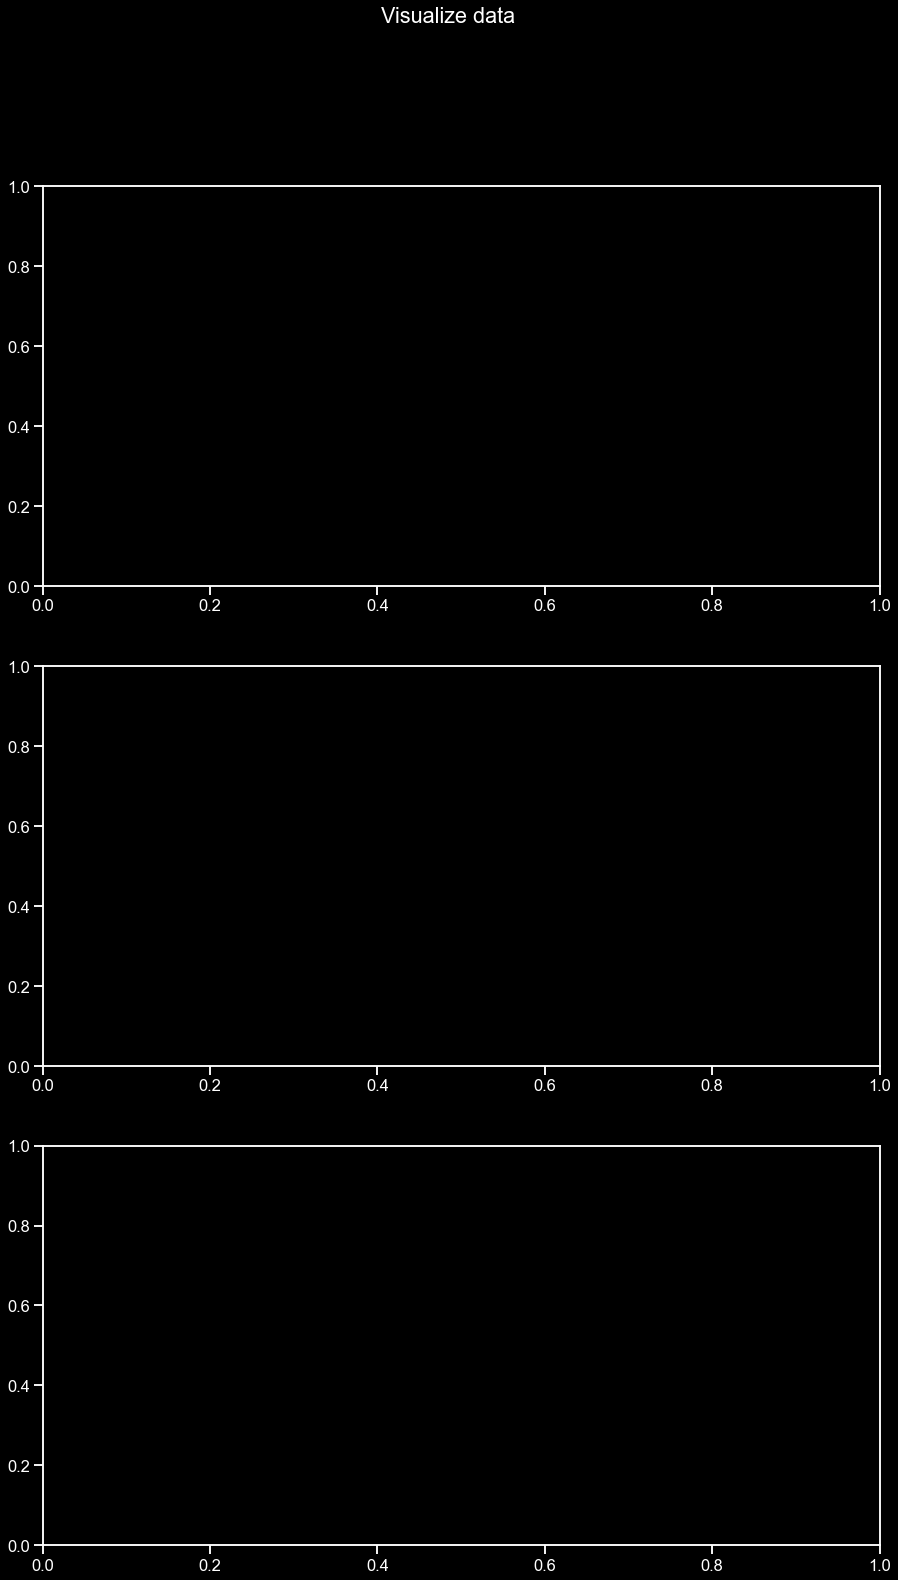

In [7]:

# t = train_df[["PM_Dongsi","datetime","season","HUMI","TEMP","PRES","Iws","precipitation"]]

# # g = sns.FacetGrid(tips, col="sex", hue="smoker")
# # g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
# # g.add_legend()

# sns.set(style="ticks", context="talk")
# plt.style.use("dark_background")
# # plt.figure(figsize=(18,6))
# # sns.lineplot(data=t[::100], x='datetime', y='season')
# # sns.lineplot(data=t[::100], x='datetime', y='HUMI')

# fig, axes = plt.subplots(3, 1, figsize=(15, 25), sharey=True)
# fig.suptitle('Visualize data')

# # season
# sns.lineplot(ax=axes[0], data=t[::100], x='datetime', y='season')
# axes[0].set_title('season')

# # Humi
# sns.lineplot(ax=axes[1], data=t[::100], x='datetime', y='HUMI')
# axes[1].set_title('humi')

# # Temp
# sns.lineplot(ax=axes[2], data=t[::100], x='datetime', y='TEMP')
# axes[2].set_title('TEMP')

# Pres
# sns.lineplot(ax=axes[0], data=t[::100], x='datetime', y='PRES')
# axes[0].set_title('PRES')

# Iws
# sns.lineplot(ax=axes[1], data=t[::100], x='datetime', y='Iws')
# axes[1].set_title('Iws')

# precipitation
# sns.lineplot(ax=axes[2], data=t[::100], x='datetime', y='precipitation')
# axes[2].set_title('precipitation')

# PM Dongsi
# _t = df.loc[df['PM_Dongsi'].notna()]
# _t = _t.loc[_t['PM_Dongsihuan'].notna()]
# sns.lineplot(ax=axes[0], data=_t[20:100], x='datetime', y='PM_Dongsi')
# axes[0].set_title('PM_Dongsi')

# PM Dongsihuan
# sns.lineplot(ax=axes[0], data=_t[20:100], x='datetime', y='PM_Dongsihuan')
# axes[1].set_title('PM_Dongsihuan')

# sns.add_legend()
# sns.lineplot(data=y_pred)
# plt.show()

mae: 18.3961942602167 mse: 893.9098957314998 rmse: 29.898325968714364 r2: 0.8770984340029105


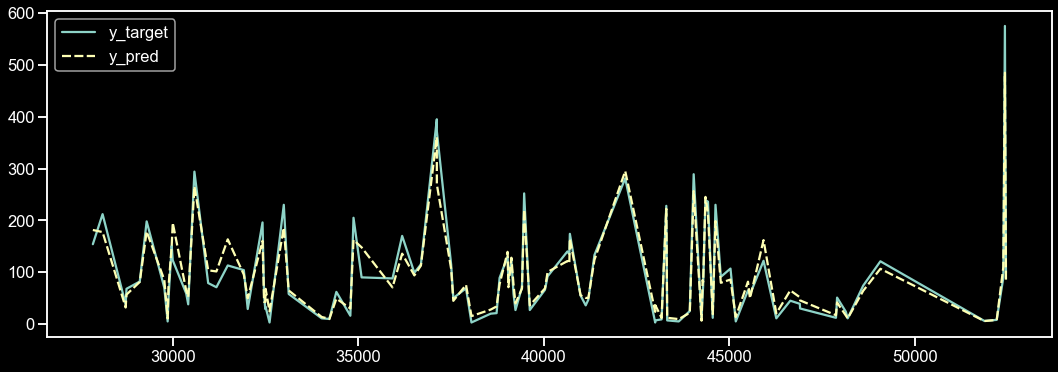

In [10]:
# len() 
# y_train.hasnans
# y_train.describe()
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


y_pred = model.predict(X_test_efs) 


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'mae: {mae}', f'mse: {mse}', f'rmse: {rmse}', f'r2: {r2}')

mse_list = mean_squared_error(y_test, y_pred, multioutput='raw_values')


def plot_y_pred_vs_test(y_pred, y_test):
    y_results = pd.DataFrame({'y_target': y_test, 'y_pred':y_pred })
    
    sns.set(style="ticks", context="talk")
    plt.style.use("dark_background")
    plt.figure(figsize=(18,6))
    sns.lineplot(data=y_results[-100:])
    # sns.lineplot(data=y_pred)
    plt.show()
    
plot_y_pred_vs_test(y_pred, y_test)

score r2 is: 0.8842218216725546


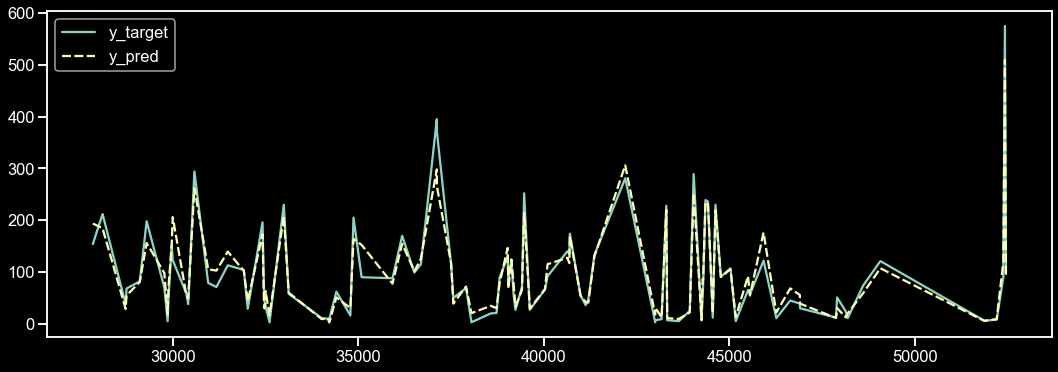

In [11]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train_efs)
X_testscaled=sc_X.transform(X_test_efs)

reg = MLPRegressor(
    hidden_layer_sizes=(64,64,64),
    activation="relu",
    random_state=1,
    max_iter=2000
).fit(X_trainscaled, y_train)


# plot_y_pred_vs_test(y_pred, y_test)

mae: 17.02490449723455 mse: 726.6850942215665 rmse: 26.957097288498375 r2: 0.9000897780715486


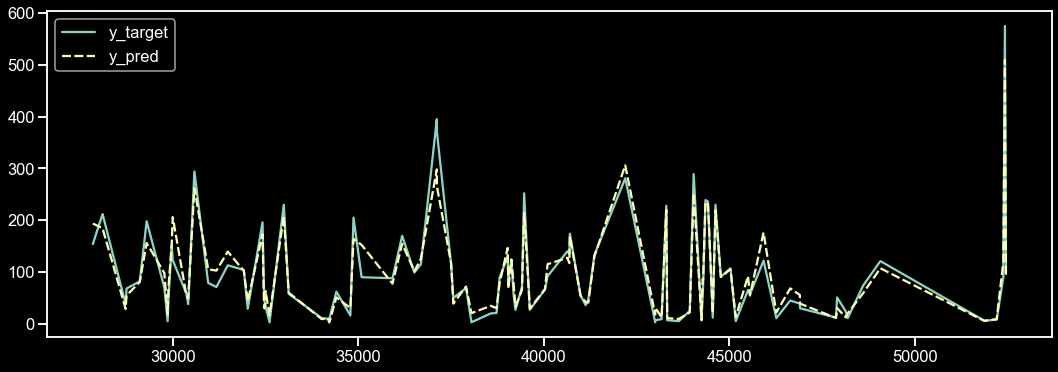

In [31]:
y_pred = reg.predict(X_testscaled)
# print(f'score r2 is: {r2_score(y_test, y_pred)}')

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'mae: {mae}', f'mse: {mse}', f'rmse: {rmse}', f'r2: {r2}')

plot_y_pred_vs_test(y_pred, y_test)

# this plot is to compare the y_pred to PM values from another local
# plot_y_pred_vs_test(y_pred, X_test_efs[:,5])


#### Evaluating with only 3 variables

- PM2.5
- Humidity
- Temp

In [32]:


X_test_efs.shape
len(X_test_efs)

_x_fields = ["HUMI", "TEMP", "PM_Dongsihuan"]
X = train_df[_x_fields]
y = train_df["PM_Dongsi"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

model = LinearRegression()
# create the ExhaustiveFeatureSelector object.
efs = ExhaustiveFeatureSelector(model, 
           min_features=2,
           max_features=len(_x_fields), 
           scoring='r2',
           cv=2)

# fit the object to the training data.
efs = efs.fit(X_train, y_train)

# print the selected features.
selected_features = X_train.columns[list(efs.best_idx_)]
print(selected_features)

# print the final prediction score.
print('Best accuracy score: %.2f' % efs.best_score_)


print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

# transform to the newly selected features.
X_train_efs = efs.transform(X_train)
X_test_efs = efs.transform(X_test)


Features: 4/4

Index(['TEMP', 'PM_Dongsihuan'], dtype='object')
Best accuracy score: 0.87
Best subset (indices): (1, 2)
Best subset (corresponding names): ('TEMP', 'PM_Dongsihuan')


In [34]:
# MLR
def print_metrics(y_pred, y_test, message='metrics'):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(message)
    print(f'mae: {mae}', f'mse: {mse}', f'rmse: {rmse}', f'r2: {r2}')


model.fit(X_train_efs, y_train)

y_pred = model.predict(X_test_efs)
print_metrics(y_pred, y_test, message='MLR metrics')


MLR metrics
mae: 18.377927949943523 mse: 895.2217635172037 rmse: 29.920256742167233 r2: 0.8769180683911033


In [35]:
# MLPRegressor

reg = MLPRegressor(
    hidden_layer_sizes=(64,64,64),
    activation="relu",
    random_state=1,
    max_iter=2000
)
# create the ExhaustiveFeatureSelector object.
efs = ExhaustiveFeatureSelector(reg, 
           min_features=1,
           max_features=3, 
           scoring='r2',
           cv=2)

# fit the object to the training data.
efs = efs.fit(X_train, y_train)

# print the selected features.
selected_features = X_train.columns[list(efs.best_idx_)]
print(selected_features)

# print the final prediction score.
print('Best accuracy score: %.2f' % efs.best_score_)


print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

# transform to the newly selected features.
X_train_efs = efs.transform(X_train)
X_test_efs = efs.transform(X_test)

sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train_efs)
X_testscaled=sc_X.transform(X_test_efs)


Features: 7/7

Index(['TEMP', 'PM_Dongsihuan'], dtype='object')
Best accuracy score: 0.87
Best subset (indices): (1, 2)
Best subset (corresponding names): ('TEMP', 'PM_Dongsihuan')


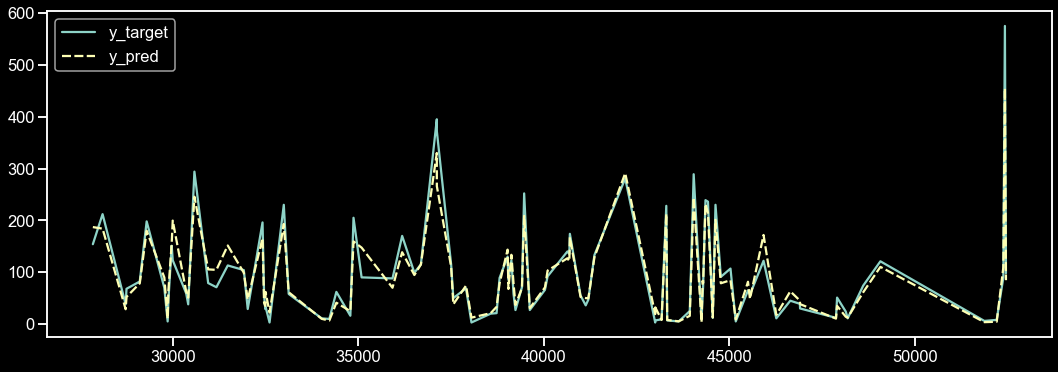

MLPRegressor metrics
mae: 17.857167895876216 mse: 853.6863155429014 rmse: 29.217910868898574 r2: 0.8826286792980953


In [39]:

reg.fit(X_trainscaled, y_train)



In [38]:
y_pred = reg.predict(X_testscaled)
plot_y_pred_vs_test(y_pred, y_test)
print_metrics(y_pred, y_test, message='MLPRegressor metrics')


(13216, 2)

## Testing with SKLearn AutoML

In [40]:
import sklearn.datasets
import sklearn.metrics

import autosklearn.regression

ModuleNotFoundError: No module named 'autosklearn'

In [ ]:

automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn_regression_example_tmp',
    output_folder='/tmp/autosklearn_regression_example_out',
)
automl.fit(X_train, y_train, dataset_name='air pollution')


In [ ]:
print(automl.show_models())
